# Programmatic Data Wrangling 
## TMDB Project

#### Importing the data

In [133]:
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 

In [134]:
import os 

In [135]:
os.getcwd()

'C:\\Users\\OLA\\Downloads'

In [136]:
os.chdir('C:\\Users\\OLA\\Downloads')
os.getcwd()

'C:\\Users\\OLA\\Downloads'

#### Original dataset

In [137]:
dataset='TMDB_movies.csv'
df = pd.read_csv(dataset)
df


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

#### Investigating nulls and duplicates

In [138]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [139]:
df.shape

(4803, 20)

In [140]:
df_no_dup=df.drop_duplicates()
df_no_dup.shape

(4803, 20)

In [141]:
unique_titles=df.title.unique()
len(unique_titles)

4800

Through this investigation, I found that there are ***null values present in this dataframe*** and identified where they are. I also found that there are no duplicate rows but there are films that share titles (***not all film titles are unique***). 

#### Creating a new table showing profit of films

In [142]:
profits = df[['title','budget','revenue']].copy()

In [143]:
profits

,title,budget,revenue
0,Avatar,237000000,2787965087
1,Pirates of the Caribbean: At World's End,300000000,961000000
2,Spectre,245000000,880674609
3,The Dark Knight Rises,250000000,1084939099
4,John Carter,260000000,284139100
...,...,...,...
4798,El Mariachi,220000,2040920
4799,Newlyweds,9000,0
4800,"Signed, Sealed, Delivered",0,0
4801,Shanghai Calling,0,0


In [144]:
profits['profit'] = profits.revenue-profits.budget 
# Calculating profit by subtracting budget from revenue
profits=profits[['title','budget','revenue','profit']]
# Ordering columns

In [145]:
profits

,title,budget,revenue,profit
0,Avatar,237000000,2787965087,2550965087
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000
2,Spectre,245000000,880674609,635674609
3,The Dark Knight Rises,250000000,1084939099,834939099
4,John Carter,260000000,284139100,24139100
...,...,...,...,...
4798,El Mariachi,220000,2040920,1820920
4799,Newlyweds,9000,0,-9000
4800,"Signed, Sealed, Delivered",0,0,0
4801,Shanghai Calling,0,0,0


I chose to calculate profits from *revenue* and *budget* because I felt it would be a more accurate measure of a film's success than revenue independently.

In [146]:
profits=profits.sort_values('profit', ascending=False).reset_index()
profits

,index,title,budget,revenue,profit
0,0,Avatar,237000000,2787965087,2550965087
1,25,Titanic,200000000,1845034188,1645034188
2,28,Jurassic World,150000000,1513528810,1363528810
3,44,Furious 7,190000000,1506249360,1316249360
4,16,The Avengers,220000000,1519557910,1299557910
...,...,...,...,...,...
4798,1652,Dragonball Evolution,100000000,0,-100000000
4799,141,Mars Needs Moms,150000000,38992758,-111007242
4800,338,The Alamo,145000000,25819961,-119180039
4801,135,The Wolfman,150000000,0,-150000000


In [ ]:
profits=profits.drop(columns=['index'])
# Dropping original index column (as it is now in the wrong order)
profits['rank']=profits.index + 1 
#Creating a new column assigning rank based on profit

In [191]:
profits

,title,budget,revenue,profit,rank
0,Avatar,237000000,2787965087,2550965087,1
1,Titanic,200000000,1845034188,1645034188,2
2,Jurassic World,150000000,1513528810,1363528810,3
3,Furious 7,190000000,1506249360,1316249360,4
4,The Avengers,220000000,1519557910,1299557910,5
...,...,...,...,...,...
4798,Dragonball Evolution,100000000,0,-100000000,4799
4799,Mars Needs Moms,150000000,38992758,-111007242,4800
4800,The Alamo,145000000,25819961,-119180039,4801
4801,The Wolfman,150000000,0,-150000000,4802


#### _Top 10 Films by Profit_

In [148]:
titles=list(profits.title)
titles.insert(8, 'LOTR: The Return of the King')
titles.pop(9)
# Replacing the title of 'Lord of the Rings: The Return of the King' 
#to make it fit better on the graph below
titles
# Checking that it worked

['Avatar',
 'Titanic',
 'Jurassic World',
 'Furious 7',
 'The Avengers',
 'Avengers: Age of Ultron',
 'Frozen',
 'Minions',
 'LOTR: The Return of the King',
 'Iron Man 3',
 'Transformers: Dark of the Moon',
 'Skyfall',
 'Captain America: Civil War',
 'Despicable Me 2',
 'Transformers: Age of Extinction',
 'Toy Story 3',
 "Pirates of the Caribbean: Dead Man's Chest",
 'Jurassic Park',
 "Harry Potter and the Philosopher's Stone",
 'The Lord of the Rings: The Two Towers',
 'Finding Nemo',
 'The Dark Knight Rises',
 'Alice in Wonderland',
 'The Dark Knight',
 'Star Wars: Episode I - The Phantom Menace',
 'The Secret Life of Pets',
 'Ice Age: Dawn of the Dinosaurs',
 'The Jungle Book',
 'Harry Potter and the Order of the Phoenix',
 'E.T. the Extra-Terrestrial',
 'Ice Age: Continental Drift',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Harry Potter and the Chamber of Secrets',
 'The Hobbit: An Unexpected Journey',
 'Shrek 2',
 'Star Wars',
 'Harry Potter and the Goblet of Fire',


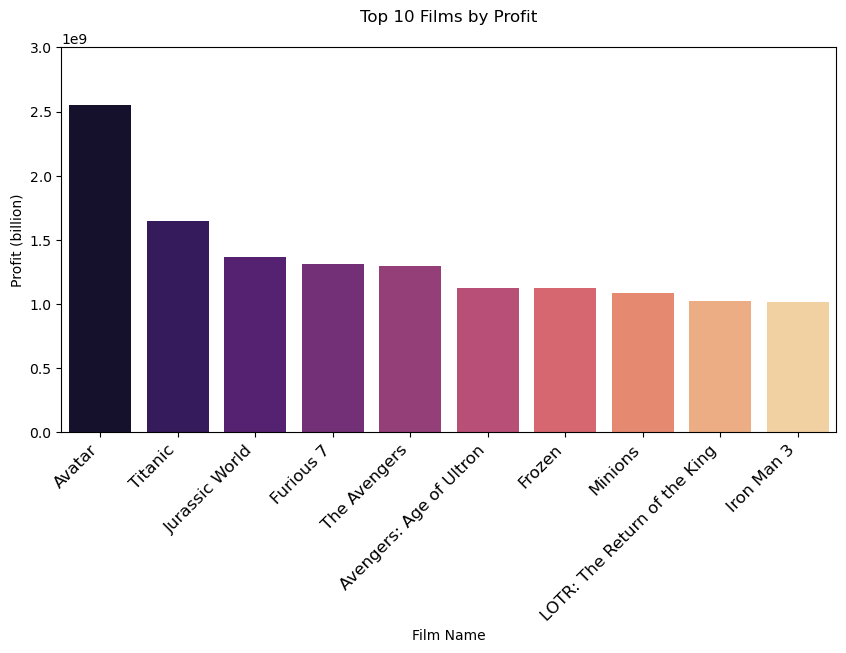

In [199]:
plt.figure(figsize = (10,5))

sns.barplot(data=profits.head(10),
            x = 'title',
            y = 'profit',
            palette = 'magma')

plt.xticks(ticks=range(10),
           labels = titles[0:10],
            rotation= 45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize = 'large')

plt.xlabel('Film Name')
plt.ylabel('Profit (billion)')
plt.ylim(0, 3000000000)

plt.title('Top 10 Films by Profit\n')
plt.show()


This is a bar plot depicting the ten most profitable films in the dataset. ****Avatar*** was the most profitable film by a very large margin.* In contrast to the success of Avatar, ***The Lone Ranger*** made a loss of over 165 million.

#### Extracting genres

In [150]:
import ast 
def extract_genres(x): 
    x = ast.literal_eval(x) 
    Genres = [] # Empty list stores genres
    
    for item in x: # Iterates through every dictionary in the column
        Genres.append(item['name']) # Appends the value of the key 'name' to the empty list
        
    return Genres # Returns new genre list

df['extracted_genres'] = df['genres'].apply(extract_genres) 
# Applies this function to the 'genres' column and creates a new column of the usable genres

# Applied the same to keywords (did not use this data for insights)
def extract_keyword(x): 
    x = ast.literal_eval(x) 
    Keyword = [] 
    
    
    for item in y: ## iterate for each dictionary in our list
        Keyword.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Keyword

df['extracted_keyword'] = df['keywords'].apply(extract_genres) 
# Applies this function to the 'keywords' column 


df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keyword
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]",[]
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, "

In [151]:
df.explode('extracted_genres') 
# Separating 'extracted_genres' into individual genres rather than a list

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keyword
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,"[culture clash, future, space war, space colon..."
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure,"[culture clash, future, space war, space colon..."
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Fantasy,"[culture clash, future, space war, space colon..."
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Science Fiction,"[culture clash, future, space war, space colon..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,"[ocean, drug abuse, exotic island, east india ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Drama,"[date, love at first sight, narration, investi..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Romance,"[date, love at first sight, narration, investi..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.c

#### Creating new table exploring profit by genre

In [152]:
genre_profit= profits.copy() # Creating new dataframe using a copy of the 'profits' dataframe
genre_profit['genres']=df[['extracted_genres']] # Adding the genres
genre_profit=genre_profit.explode('genres') #Separating the genre list into individual genres
genre_profit
genre_profit=genre_profit[genre_profit['budget'] !=0] # Removing rows where budget=0
genre_profit=genre_profit[genre_profit['revenue'] !=0] # Removing rows where revenue=0

genre_profit.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = ['genres'], 
    inplace=True)
# Dropping rows where genre is null

gp2=genre_profit[['budget','revenue','profit','genres']]
gp2['ratings']=df[['vote_average']]
# Creating a new dataframe and adding the average vote as a new column
gp2=gp2.groupby('genres')[['profit','budget','revenue','ratings']].mean().sort_values('profit', ascending=False)
# Grouping the values by genre and calculating the mean average profit, budget, revenue and vote for each genre
# Sorting dataframe by most profitable genre
gp2

C:\Users\OLA\AppData\Local\Temp\ipykernel_7476\646034591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp2['ratings']=df[['vote_average']]


,profit,budget,revenue,ratings
genres,,,,
Adventure,2.025481e+08,6.057299e+07,2.631211e+08,6.142814
Fantasy,1.884015e+08,5.770501e+07,2.461065e+08,6.077500
Animation,1.816194e+08,6.070706e+07,2.423265e+08,6.352709
Science Fiction,1.657523e+08,5.796885e+07,2.237211e+08,5.990244
Action,1.522325e+08,5.142534e+07,2.036578e+08,5.984233
Family,1.465963e+08,5.255281e+07,1.991491e+08,6.028148
War,9.659845e+07,3.971003e+07,1.363085e+08,6.651685
Thriller,7.935259e+07,4.039528e+07,1.197479e+08,6.020156
Western,6.983444e+07,4.163158e+07,1.114660e+08,6.224561


I chose to remove rows where *genre was null*. There were some films that had *revenue or budget as 0* and I chose to remove these also. This is because it is not likely for a film to be made with absolutely no budget or to earn absolutely no revenue, so these 0 values seemed to be used to fill absent data. For this reason, I removed these datapoints before visualising the data.

#### _Average Profit Made by Films of Each Genre_

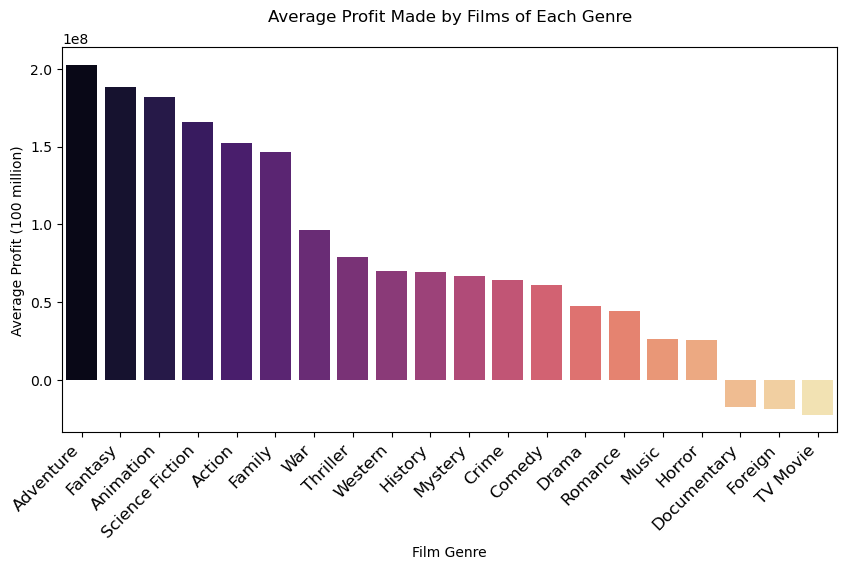

In [153]:
plt.figure(figsize = (10,5))

sns.barplot(data = gp2,
            x = gp2.index, #sets x axis
            y = 'profit' # sets y axis
            palette='magma')

plt.xticks( rotation= 45,
            horizontalalignment = 'right',
            fontweight = 'light', 
            fontsize = 'large') # Formatting the graph

plt.xlabel('Film Genre')
plt.ylabel('Average Profit (100 million)')

plt.title('Average Profit Made by Films of Each Genre\n')
plt.show()

This is a bar graph showing the average profit made by each genre. Adventure has made the most profit (200 million). *Documentary, Foreign  and TV Movie* all made a loss. ***Avatar*** is categorised as ***Adventure, Fantasy, Animation and Science Fiction***, which are the top 4 most profitable genres. ***The Lone Ranger*** is categorised as ***Action, Adventure and Western***, which are some of the most profitable genres despite the large loss.

#### *Subplot - Average Profit/Vote by Genre*

C:\Users\OLA\AppData\Local\Temp\ipykernel_7476\479978333.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(gp2.index, rotation= 45, horizontalalignment = 'right', fontsize='12')
C:\Users\OLA\AppData\Local\Temp\ipykernel_7476\479978333.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(gp2.index, rotation= 45, horizontalalignment = 'right', fontsize='12')


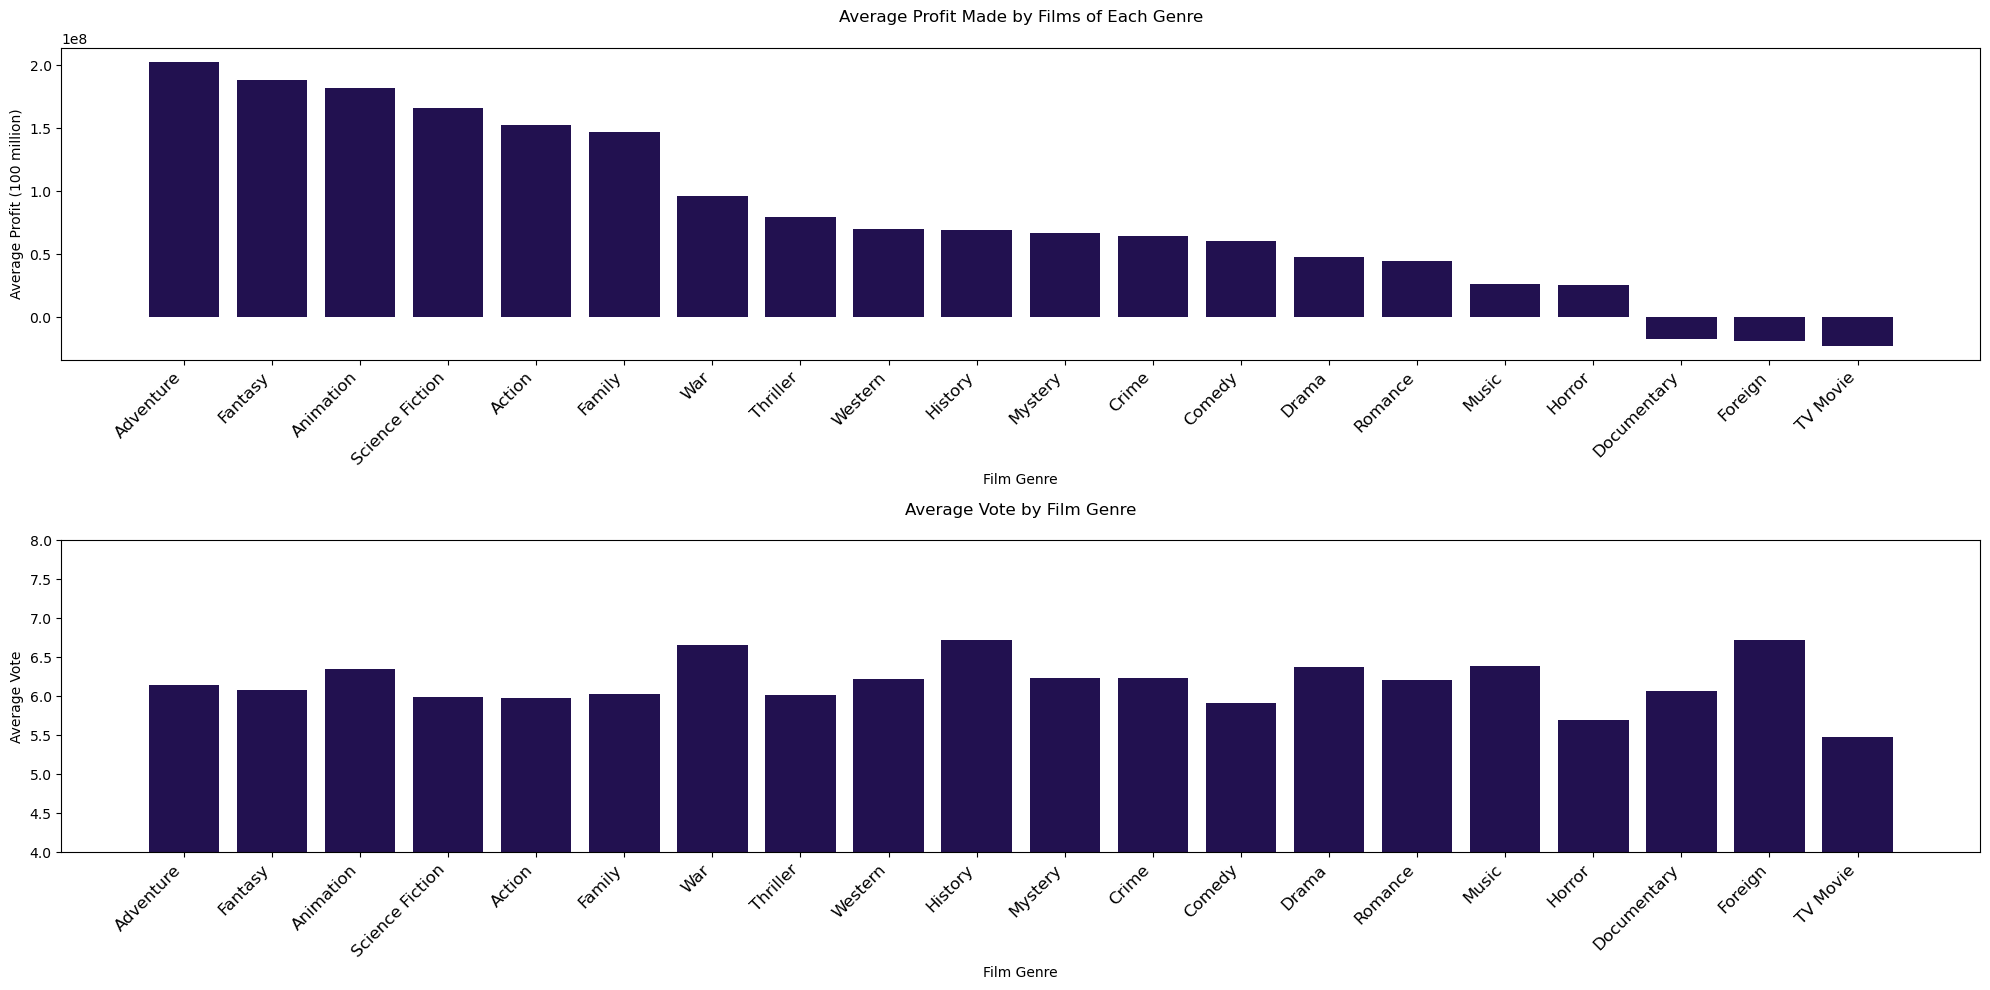

In [186]:
fig, axs = plt.subplots( 2, 1, figsize=(20,10))
sns.set_palette('magma')

# Plot on the first subplot (top)
# axs[row,col]
axs[0].bar(gp2.index, gp2['profit'])
axs[0].set_xlabel('Film Genre')
axs[0].set_xticklabels(gp2.index, rotation= 45, horizontalalignment = 'right', fontsize='12')
axs[0].set_ylabel('Average Profit (100 million)')
axs[0].set_title('Average Profit Made by Films of Each Genre\n')


# Plot on the second subplot (bottom)
axs[1].bar(gp2.index, gp2['ratings'])
axs[1].set_xlabel('Film Genre')
axs[1].set_xticklabels(gp2.index, rotation= 45, horizontalalignment = 'right', fontsize='12')
axs[1].set_title('Average Vote by Film Genre\n')
axs[1].set_ylabel('Average Vote')
axs[1].set_ylim(4,8)

plt.tight_layout()

plt.show()

This is a subplot containing two bar plots showing average profit made by each genre and the average vote by each genre. I wanted to compare the shape of the graphs and see if genre has a similar effect on votes. 

#### *Correlation Heatmap*

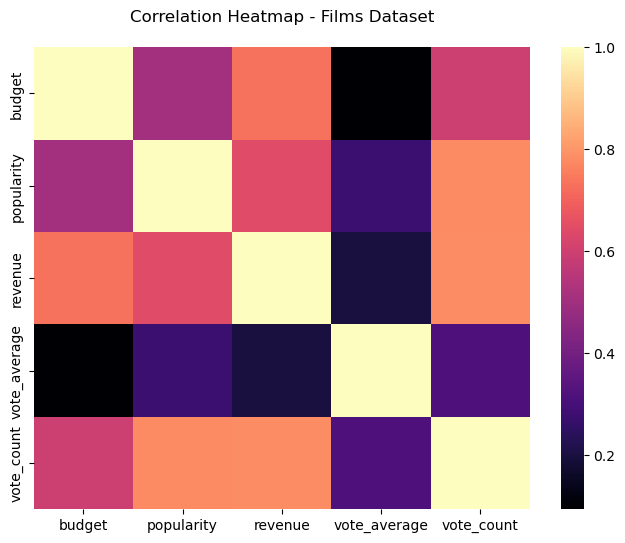

In [196]:
num_corr=df[['budget', 'popularity','revenue','vote_average','vote_count']].copy() 
# Creating a new dataframe


# Compute the correlation matrix
correlation_matrix = num_corr.corr(numeric_only=True)


# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='magma')
plt.title('Correlation Heatmap - Films Dataset\n')
plt.show()


#### *Investigating the 2013 releases*

In [ ]:
gp2

In [211]:
releases=df[(df['release_date']>'2013-01-01') &(df['release_date']<'2014-01-01')] # Selecting films that came out in 2013
releases=releases[['release_date','title','extracted_genres', 'vote_average', 'popularity','revenue','budget']]
releases['profit']=releases.revenue-releases.budget # Calculating profit

releases=releases.sort_values('profit', ascending=False) # Ordering the values by profit
releases=releases.reset_index() # Resetting index as it is now in the wrong order
releases=releases.drop(columns=['index']) #Dropping the original index column
releases

,release_date,title,extracted_genres,vote_average,popularity,revenue,budget,profit
0,2013-11-27,Frozen,"[Animation, Adventure, Family]",7.3,165.125366,1274219009,150000000,1124219009
1,2013-04-18,Iron Man 3,"[Action, Adventure, Science Fiction]",6.8,77.682080,1215439994,200000000,1015439994
2,2013-06-25,Despicable Me 2,"[Animation, Comedy, Family]",7.0,136.886704,970761885,76000000,894761885
3,2013-11-15,The Hunger Games: Catching Fire,"[Adventure, Action, Science Fiction]",7.4,76.310119,847423452,130000000,717423452
4,2013-12-11,The Hobbit: The Desolation of Smaug,"[Adventure, Fantasy]",7.6,94.370564,958400000,250000000,708400000
...,...,...,...,...,...,...,...,...
222,2013-01-31,Bullet to the Head,"[Action, Crime, Thriller]",5.2,22.503935,9489829,55000000,-45510171
223,2013-06-13,Legends of Oz: Dorothy's Return,"[Animation, Music, Family]",5.9,6.682006,18662027,70000000,-51337973
224,2013-07-18,R.I.P.D.,"[Fantasy, Action, Comedy, Crime]",5.4,39.448066,61648500,130000000,-68351500
225,2013-07-18,RED 2,"[Action, Comedy, Crime, Thriller]",6.4,44.343330,0,84000000,-84000000


I investigated films that came out in the same year as _**The Lone Ranger**_ to see if its loss could be partially atrributed to high competition. _Much higher rated films and two of the top 10 most profitable films in the dataset came out in 2013 **(Frozen and Iron Man 3)**. **Despicable Me 2**_, which was a very successful film, also _came out very close to the release date of **The Lone Ranger**_. Action, Adventure films are also very common so perhaps more incentive was needed to watch this one in particular.